# Header

A4: Decision Tree and Naïve Cross-validation

Sarah Kim

09/20/2022

#Task 1

##A. Data Import

In [207]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
from google.colab import data_table

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate

In [208]:
cd_df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

##B. Remove all the numeric features

In [209]:
object_columns_list = list(cd_df.select_dtypes(include='object').columns)
cd_df = cd_df.select_dtypes(include=('object'))
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
 10  y            4117 non-null   object
dtypes: object(11)
memory usage: 353.9+ KB


##B. pop() the target variable into a new variable ie y_target.

In [210]:
y_target = cd_df.pop('y')
y_target = y_target.eq('yes').mul(1)

##B. Show the overall structure and summary of the data frame

In [211]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB


In [212]:
cd_df.describe(include='all')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522


In [213]:
cd_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


##B. Encode the dataframe using pd.get_dummies()

In [214]:
cd_df_encoded = pd.get_dummies(cd_df)

In [215]:
cd_df_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


##C. Partition this data frame for simple hold-out evaluation 

In [216]:
train_x, test_x, train_y, test_y = train_test_split(cd_df_encoded, y_target, train_size=.7, random_state=42)

##D. Show the distributions

In [217]:
y_target.value_counts(normalize=True)

0    0.890454
1    0.109546
Name: y, dtype: float64

As can be seen above, the distribution of the target variable has been preserved during the train/test splitting, and this is because of the random nature of sampling from the original dataframe during the partition process.

##E. Explain in a text box below the key differences

The previous CD dataset was larger in terms of records, with 9280 instances, whereas this dataset has 4117 instances. Also, the previous CD dataset was balanced in its binary distribution of the target variable, whereas this dataset is imbalanced in the target variable binary distribution, with an approximate 89/11 ratio of the no-to-yes classes.

#Task 2

##Simple Decision Tree Training and Testing

In [218]:
random_state=42


In [219]:
decision_tree = tree.DecisionTreeClassifier(random_state=random_state,ccp_alpha=.005)
decision_tree
decision_tree = decision_tree.fit(train_x,train_y)

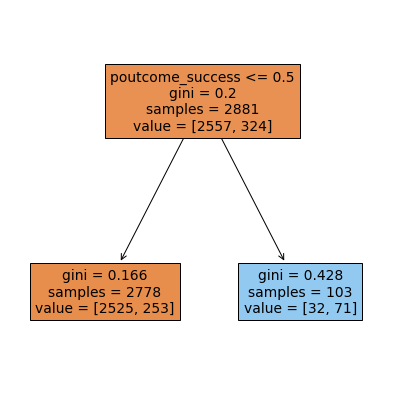

In [220]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(decision_tree,
                   feature_names=train_x.columns.to_list(),
                   filled=True)

In [221]:
predictions_train = decision_tree.predict(train_x)
predictions_test = decision_tree.predict(test_x)


In [222]:
print("Shape of Training Predictions: "+str(predictions_train.shape))

Shape of Training Predictions: (2881,)


In [223]:
print("Shape of Testing Predictions: "+str(predictions_test.shape))

Shape of Testing Predictions: (1236,)


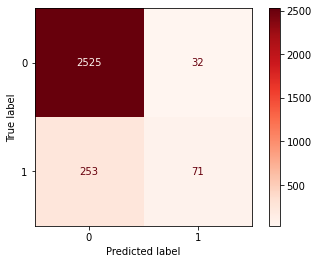

In [224]:
# Display the confusion matrix for the training ground truth and predictions as a plot.
con_mat_train = confusion_matrix(train_y,predictions_train,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Reds)
plt.show()

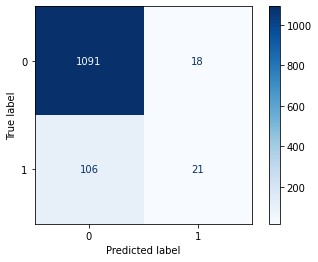

In [225]:
# Display the confusion matrix for the testing ground truth and predictions as a plot instead.
con_mat_test = confusion_matrix(test_y,predictions_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [226]:
# Evaluate the fitted model on the training set with the classification report
print(classification_report(train_y,predictions_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2557
           1       0.69      0.22      0.33       324

    accuracy                           0.90      2881
   macro avg       0.80      0.60      0.64      2881
weighted avg       0.88      0.90      0.88      2881



In [227]:
# Evaluate the fitted model on the testing set with the classification report
print(classification_report(test_y,predictions_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1109
           1       0.54      0.17      0.25       127

    accuracy                           0.90      1236
   macro avg       0.72      0.57      0.60      1236
weighted avg       0.87      0.90      0.87      1236



Overall, the model performs well on the zero (no) class, but poorly on the one (yes) class. This is evidenced by the shallow drop in f-score between the traiing and testing results for the former, and the steep drop between them for the latter. It is certainly not a majority classifier, as it doesn't predict all records to be of the majority class (no), though the steep drop in most metrics between the training and testing sets is evidence that the model is too complex and is overfitting on the training data. A random classifier would make predictions in proportion to the distribution of the target variable, and the decision tree comes dangerously close to having done this, when the FN and FP numbers are compared with the TN and the number of "yes" class instances. Classifying on imbalanced data sets is a much harder problem than for balanced data sets, particularly for capturing the minority class instances and not over-predicting the majority class.

#Task 3

##Simple Naïve Bayes Model Training and Testing

In [228]:
# Define the Naive Bayes classifier.
categorical_nb = CategoricalNB()

In [229]:
categorical_nb = categorical_nb.fit(train_x,train_y)

In [230]:
# Use the fitted model to make predictions on the training data.
categorical_nb_predictions_train = categorical_nb.predict(train_x)
categorical_nb_predictions_test = categorical_nb.predict(test_x)

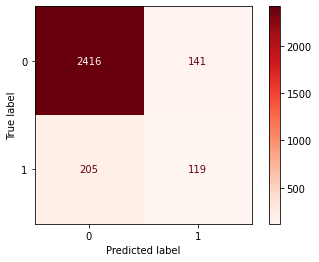

In [231]:
# Display the confusion matrix for the training ground truth and predictions as a plot instead.
con_mat_train = confusion_matrix(train_y,categorical_nb_predictions_train,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=categorical_nb.classes_)
ax.plot(values_format='',cmap=plt.cm.Reds)
plt.show()

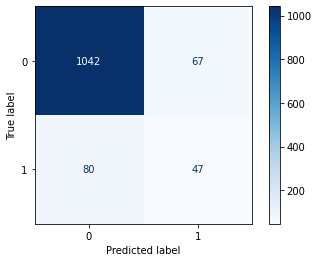

In [232]:
# Display the confusion matrix for the testing ground truth and predictions as a plot instead.
con_mat_test = confusion_matrix(test_y,categorical_nb_predictions_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=categorical_nb.classes_)
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [233]:
# Print the Training Classification Report for the Naive Bayes Model.
print(classification_report(train_y,categorical_nb_predictions_train))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2557
           1       0.46      0.37      0.41       324

    accuracy                           0.88      2881
   macro avg       0.69      0.66      0.67      2881
weighted avg       0.87      0.88      0.87      2881



In [234]:
# Print the Testing Classification Report for the Naive Bayes Model.
print(classification_report(test_y,categorical_nb_predictions_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1109
           1       0.41      0.37      0.39       127

    accuracy                           0.88      1236
   macro avg       0.67      0.65      0.66      1236
weighted avg       0.88      0.88      0.88      1236



The model has a hard time identifying the minority class, with relatively low precision and recall scores on both the training and testing data. However, there is not a precipative drop-off between the training and testing data results, indicating that the naive bayes model is not overfitting. Moreover, it seems to perform better than the decision tree model. It is obviously not a majority classifier, and the deviation away from random classifier is greater thant he decision tree model. Though the imbalanced data set classification problem is harder than its balanced counterpart, the naive bayesian model does better than the default decision tree.

#Task 4

##5-fold and 10-fold decision tree and naive Bayes evaluation performance with sklearn's cross_validate() 

In [235]:
# Assign the decision tree classifier.
decision_tree_cross = DecisionTreeClassifier(random_state=random_state)
print(decision_tree_cross)

DecisionTreeClassifier(random_state=42)


In [236]:
X_full = np.concatenate((train_x,test_x),axis=0)
y_full = np.concatenate((train_y,test_y),axis=0)


###5-fold

In [237]:
# Defind a new categorical Naive Bayes model.
categorical_nb_cross = CategoricalNB()

####Decision Tree

In [238]:
# Perform 5-fold cross-validation on the entire dataset with this new Decision Tree model.
five_fold_cv_dt_results = cross_validate(decision_tree_cross,X_full,y_full,cv=5,scoring=['accuracy','f1','precision','recall'],return_train_score=True)

In [239]:
print("Five-fold Cross-Validation Training Accuracy: "+str(five_fold_cv_dt_results['train_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Training Precision: "+str(five_fold_cv_dt_results['train_precision'].mean().round(5)))
print("Five-fold Cross-Validation Training Recall: "+str(five_fold_cv_dt_results['train_recall'].mean().round(5)))
print("Five-fold Cross-Validation Training F-Score: "+str(five_fold_cv_dt_results['train_f1'].mean().round(5)))
print("\n")
print("Five-fold Cross-Validation Testing Accuracy: "+str(five_fold_cv_dt_results['test_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Testing Precision: "+str(five_fold_cv_dt_results['test_precision'].mean().round(5)))
print("Five-fold Cross-Validation Testing Recall: "+str(five_fold_cv_dt_results['test_recall'].mean().round(5)))
print("Five-fold Cross-Validation Testing F-Score: "+str(five_fold_cv_dt_results['test_f1'].mean().round(5)))

Five-fold Cross-Validation Training Accuracy: 0.98051
Five-fold Cross-Validation Training Precision: 0.99801
Five-fold Cross-Validation Training Recall: 0.82372
Five-fold Cross-Validation Training F-Score: 0.90249


Five-fold Cross-Validation Testing Accuracy: 0.84163
Five-fold Cross-Validation Testing Precision: 0.28043
Five-fold Cross-Validation Testing Recall: 0.27277
Five-fold Cross-Validation Testing F-Score: 0.27352


####Naive Bayes

In [240]:
# Perform 5-fold cross-validation on the entire dataset with this new Categorical Naive Bayes model.
five_fold_cv_nb_results = cross_validate(categorical_nb_cross,X_full,y_full,cv=5,scoring=['accuracy','f1','precision','recall'],return_train_score=True)

In [241]:
print("Five-fold Cross-Validation Training Accuracy: "+str(five_fold_cv_nb_results['train_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Training Precision: "+str(five_fold_cv_nb_results['train_precision'].mean().round(5)))
print("Five-fold Cross-Validation Training Recall: "+str(five_fold_cv_nb_results['train_recall'].mean().round(5)))
print("Five-fold Cross-Validation Training F-Score: "+str(five_fold_cv_nb_results['train_f1'].mean().round(5)))
print("\n")
print("Five-fold Cross-Validation Testing Accuracy: "+str(five_fold_cv_nb_results['test_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Testing Precision: "+str(five_fold_cv_nb_results['test_precision'].mean().round(5)))
print("Five-fold Cross-Validation Testing Recall: "+str(five_fold_cv_nb_results['test_recall'].mean().round(5)))
print("Five-fold Cross-Validation Testing F-Score: "+str(five_fold_cv_nb_results['test_f1'].mean().round(5)))

Five-fold Cross-Validation Training Accuracy: 0.88177
Five-fold Cross-Validation Training Precision: 0.45148
Five-fold Cross-Validation Training Recall: 0.36807
Five-fold Cross-Validation Training F-Score: 0.40542


Five-fold Cross-Validation Testing Accuracy: 0.88001
Five-fold Cross-Validation Testing Precision: 0.44114
Five-fold Cross-Validation Testing Recall: 0.35482
Five-fold Cross-Validation Testing F-Score: 0.39255


###10-fold

####Decision Tree

In [242]:
# Perform 10-fold cross-validation on the entire dataset with this new Decision Tree model.
ten_fold_cv_dt_results = cross_validate(decision_tree_cross,X_full,y_full,cv=10,scoring=['accuracy','f1','precision','recall'],return_train_score=True)

In [243]:
print("Ten-fold Cross-Validation Training Accuracy: "+str(ten_fold_cv_dt_results['train_accuracy'].mean().round(5)))
print("Ten-fold Cross-Validation Training Precision: "+str(ten_fold_cv_dt_results['train_precision'].mean().round(5)))
print("Ten-fold Cross-Validation Training Recall: "+str(ten_fold_cv_dt_results['train_recall'].mean().round(5)))
print("Ten-fold Cross-Validation Training F-Score: "+str(ten_fold_cv_dt_results['train_f1'].mean().round(5)))
print("\n")
print("Ten-fold Cross-Validation Testing Accuracy: "+str(ten_fold_cv_dt_results['test_accuracy'].mean().round(5)))
print("Ten-fold Cross-Validation Testing Precision: "+str(ten_fold_cv_dt_results['test_precision'].mean().round(5)))
print("Ten-fold Cross-Validation Testing Recall: "+str(ten_fold_cv_dt_results['test_recall'].mean().round(5)))
print("Ten-fold Cross-Validation Testing F-Score: "+str(ten_fold_cv_dt_results['test_f1'].mean().round(5)))

Ten-fold Cross-Validation Training Accuracy: 0.97908
Ten-fold Cross-Validation Training Precision: 0.99789
Ten-fold Cross-Validation Training Recall: 0.81079
Ten-fold Cross-Validation Training F-Score: 0.89465


Ten-fold Cross-Validation Testing Accuracy: 0.84406
Ten-fold Cross-Validation Testing Precision: 0.27861
Ten-fold Cross-Validation Testing Recall: 0.26174
Ten-fold Cross-Validation Testing F-Score: 0.26866


####Naive Bayes

In [244]:
# Perform 10-fold cross-validation on the entire dataset with this new Categorical Naive Bayes model.
ten_fold_cv_nb_results = cross_validate(categorical_nb_cross,X_full,y_full,cv=10,scoring=['accuracy','f1','precision','recall'],return_train_score=True)

In [245]:
print("Ten-fold Cross-Validation Training Accuracy: "+str(ten_fold_cv_nb_results['train_accuracy'].mean().round(5)))
print("Ten-fold Cross-Validation Training Precision: "+str(ten_fold_cv_nb_results['train_precision'].mean().round(5)))
print("Ten-fold Cross-Validation Training Recall: "+str(ten_fold_cv_nb_results['train_recall'].mean().round(5)))
print("Ten-fold Cross-Validation Training F-Score: "+str(ten_fold_cv_nb_results['train_f1'].mean().round(5)))
print("\n")
print("Ten-fold Cross-Validation Testing Accuracy: "+str(ten_fold_cv_nb_results['test_accuracy'].mean().round(5)))
print("Ten-fold Cross-Validation Testing Precision: "+str(ten_fold_cv_nb_results['test_precision'].mean().round(5)))
print("Ten-fold Cross-Validation Testing Recall: "+str(ten_fold_cv_nb_results['test_recall'].mean().round(5)))
print("Ten-fold Cross-Validation Testing F-Score: "+str(ten_fold_cv_nb_results['test_f1'].mean().round(5)))

Ten-fold Cross-Validation Training Accuracy: 0.8816
Ten-fold Cross-Validation Training Precision: 0.45043
Ten-fold Cross-Validation Training Recall: 0.36635
Ten-fold Cross-Validation Training F-Score: 0.40397


Ten-fold Cross-Validation Testing Accuracy: 0.87855
Ten-fold Cross-Validation Testing Precision: 0.43844
Ten-fold Cross-Validation Testing Recall: 0.35261
Ten-fold Cross-Validation Testing F-Score: 0.38982


#Task 5

In [250]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [252]:
%%shell
jupyter nbconvert --to html '/content/gdrive/MyDrive/A3_Kim_Sarah.ipynb'

[NbConvertApp] Converting notebook A4_Kim_Sarah.ipynb to html
[NbConvertApp] Writing 436873 bytes to A4_Kim_Sarah.html
